# Задание 7. 
Решить дифференциальное уравнение методом сеток (задание – 1.5, варианты – 1.6, по второй части методички).

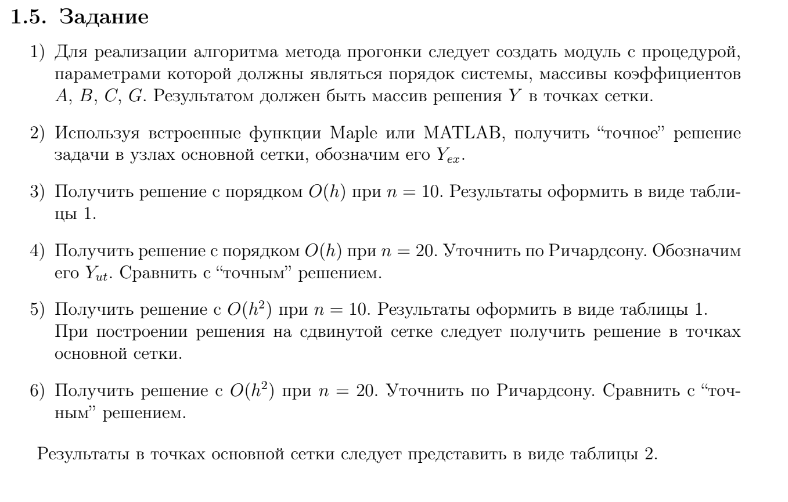

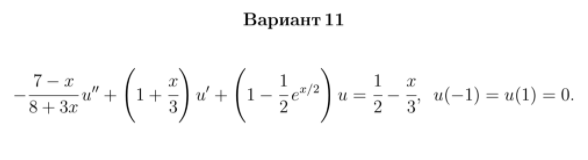

В данном примере работает следующее замечание:
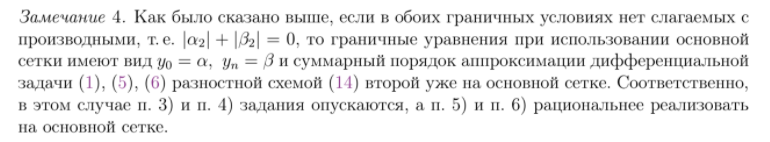

In [28]:
import math
import numpy as np
import pandas as pd

EX = [0, 0.0384, 0.0733, 0.1049, 0.1330, 0.1579, 0.1796, 0.1979, 0.2130, 0.2248, 0.2330, 0.2377, 0.2384, 0.2348, 0.2263, 0.2121, 0.1911, 0.1619, 0.1224, 0.0698, 0]

def p(x):
  return (7-x)/(8+3*x)

def q(x):
  return 1 + x/3

def r(x):
  return 1 - 0.5*math.exp(x/2)

def f(x):
 return 0.5 - x/3

a = -1
b = 1
y_0 = 0
y_n = 0
a1, a2, alpha = 1, 0, 0
b1, b2, beta = 1, 0, 0

def progonka(n):
  h = (b - a) / n
  X, A, B, C, G, s, t = [], [], [], [], [], [], []
  for i in range(n + 1):
    x = a + i * h
    
    if i == 0:
      Ai, Ci, Gi, si, ti = 0, 0, 0, 0, 0
      Bi = 1
      
    elif i == n:
      Ai, Ci, Gi, si = 0, 0, 0, 0
      Bi = 1
      ti = y_n

    else:
      Ai = -p(x)/h**2 - q(x)/(2*h)
      Bi = -(2 * p(x)/h**2 + r(x))
      Ci = -p(x)/h**2 + q(x)/(2 * h)
      Gi = f(x)
      si = Ci/(Bi - Ai*s[-1])
      ti = (Ai*t[-1] - Gi) / (Bi - Ai*s[-1])
      
    X.append(x)
    A.append(Ai)
    B.append(Bi)
    C.append(Ci)
    G.append(Gi)
    s.append(si)
    t.append(ti)
    
  y = []
  y.append(y_n)

  for i in range(n):
    j = n - i - 1
    y_j = s[j] * y[-1] + t[j]
    y.append(y_j)
    
  y = y[::-1]
  
  return y, X, A, B, C, G, s, t

y_10, X_10, A_10, B_10, C_10, G_10, s_10, t_10 = progonka(10)

print("Решение с О(h^2) при n = 10:")
table1 = pd.DataFrame({"X" : X_10, "Точное": EX[::2], "Прогонка O(h^2), n=10": y_10, "A": A_10, "B": B_10, "C": C_10, "G": G_10, "s" : s_10, "t" : t_10})
table1

,X,Точное,"Прогонка O(h^2), n=10",A,B,C,G,s,t
0,-1.0,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
1,-0.8,0.0733,0.073257,-36.654762,-70.307697,-32.988095,0.766667,0.469196,0.010904
2,-0.6,0.1330,0.132892,-32.645161,-61.919913,-28.645161,0.700000,0.614664,0.022659
3,-0.4,0.1796,0.179339,-29.372549,-55.002399,-25.039216,0.633333,0.677685,0.035154
4,-0.2,0.2130,0.212761,-26.657658,-49.196230,-21.990991,0.566667,0.706408,0.048306
5,0.0,0.2330,0.232804,-24.375000,-44.250000,-19.375000,0.500000,0.716762,0.062056
6,0.2,0.2384,0.238222,-22.434109,-39.982298,-17.100775,0.433333,0.715442,0.076373
7,0.4,0.2263,0.226222,-20.768116,-36.258864,-15.101449,0.366667,0.705659,0.091250
8,0.6,0.1911,0.191270,-19.326531,-32.978132,-13.326531,0.300000,0.689059,0.106697
9,0.8,0.1224,0.122737,-18.070513,-30.061780,-11.737179,0.233333,0.666502,0.122737


In [29]:
y_20, X_20, A_20, B_20, C_20, G_20, s_20, t_20 = progonka(20)

print("Решение с О(h^2) при n = 20:")
table2 = pd.DataFrame({"X" : X_20, "Точное": EX, "Прогонка O(h^2), n=20": y_20, "A": A_20, "B": B_20, "C": C_20, "G": G_20, "s" : s_20, "t" : t_20})
table2

,X,Точное,"Прогонка O(h^2), n=20",A,B,C,G,s,t
0,-1.0,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
1,-0.9,0.0384,0.038394,-152.556604,-298.794393,-145.556604,0.800000,0.487146,0.002677
2,-0.8,0.0733,0.073318,-142.952381,-279.236269,-135.619048,0.766667,0.647045,0.005484
3,-0.7,0.1049,0.104837,-134.341808,-261.664605,-126.675141,0.733333,0.724937,0.008413
4,-0.6,0.1330,0.133011,-126.580645,-245.790881,-118.580645,0.700000,0.769865,0.011458
5,-0.5,0.1579,0.157888,-119.551282,-231.379830,-111.217949,0.666667,0.798168,0.014615
6,-0.4,0.1796,0.179502,-113.156863,-218.237693,-104.490196,0.633333,0.816844,0.017880
7,-0.3,0.1979,0.197862,-107.316901,-206.203449,-98.316901,0.600000,0.829382,0.021248
8,-0.2,0.2130,0.212946,-101.963964,-195.142176,-92.630631,0.566667,0.837717,0.024718
9,-0.1,0.2248,0.224692,-97.041126,-184.939970,-87.374459,0.533333,0.843001,0.028288


In [43]:
# Уточнение по Ричардсону
y_r, y_diff = [0], [0]
for i in range(1, len(y_10)-1):
  temp = y_20[2*i] + (y_20[2*i] - y_10[i])/7
  y_r.append(temp)
  y_diff.append(temp - EX[2*i])
y_r.append(0)
y_diff.append(0)

print("Таблица результатов:")
table3 = pd.DataFrame({"X" : X_10, "Y_ex": EX[::2], "Y_ut": y_r, "Y_ut - Y_ex" : y_diff})
table3



,X,Y_ex,Y_ut,Y_ut - Y_ex
0,-1.0,0.0000,0.000000,0.000000
1,-0.8,0.0733,0.073327,0.000027
2,-0.6,0.1330,0.133028,0.000028
3,-0.4,0.1796,0.179525,-0.000075
4,-0.2,0.2130,0.212972,-0.000028
5,0.0,0.2330,0.233006,0.000006
6,0.2,0.2384,0.238366,-0.000034
7,0.4,0.2263,0.226253,-0.000047
8,0.6,0.1911,0.191142,0.000042
9,0.8,0.1224,0.122486,0.000086


*Работу выполнил Пашов Павел, группа 323.*